Saving resampled_data_final_cleaned.csv to resampled_data_final_cleaned (3).csv
    label  label_encoded
0  normal              0
1  normal              0
2  normal              0
3  normal              0
4  normal              0

모델 정확도: 1.0000

분류 리포트:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       190

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



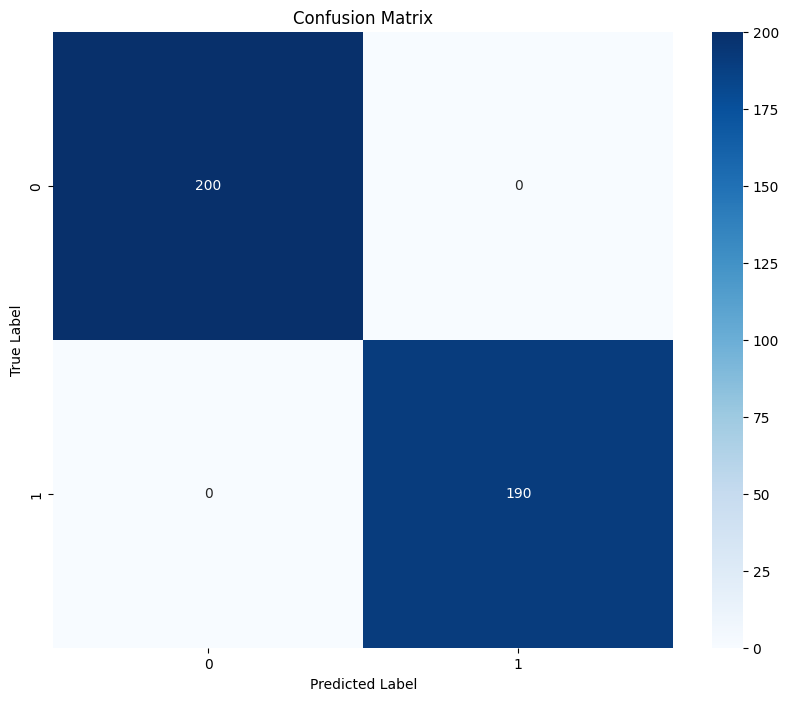

['xgb_model.pkl']

In [5]:
!pip install scikit-learn pandas xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 데이터 불러오기
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# 'label' 컬럼을 정수형 레이블로 인코딩
df['label_encoded'] = df['label'].map({'normal': 0, 'abnormal': 1})
print(df[['label', 'label_encoded']].head())


# 피처(X)와 타겟(y) 분리
features = df.drop(['label', 'label_encoded'], axis=1)
target = df['label_encoded']

# 4. 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# 5. 모델 학습 (XGBoost)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = xgb_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 분류 리포트 출력
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 훈련된 모델 파일 추출
joblib.dump(xgb_model, 'xgb_model.pkl')